# Train Golf card game RL agent with DQN

imports

In [10]:
import time
from stable_baselines3 import DQN
from stable_baselines3.common.callbacks import BaseCallback, EvalCallback
from stable_baselines3.common.utils import get_device
import matplotlib.pyplot as plt


In [2]:
from src.player.golf_train_env import GolfTrainEnv

In [3]:
# Initialize Gymnasium environment

env = GolfTrainEnv()

500 000 episodes with cuda took 13 minutes.

2 000 000 episodes took 53 mins with cuda

In [4]:
EPISODES = 10000

add a logger to inspect the training process

In [5]:

# Check frequency (episodes)
CHECK_FREQ = 1000

class RewardLoggerCallback(BaseCallback):
    def __init__(self, check_freq: int = 1000, verbose: int = 1):
        super().__init__(verbose)
        self.check_freq = check_freq
        self.rewards = []
        self.timesteps = []
        self.episode_rewards = 0  # To track cumulative reward for each episode

    def _on_step(self) -> bool:
        # Update episode reward with current reward
        reward = self.locals["rewards"]  # Current reward from the environment
        self.episode_rewards += reward

        # Check if the episode is done
        if self.locals["dones"]:
            self.rewards.append(self.episode_rewards)
            self.timesteps.append(self.num_timesteps)
            if self.verbose > 0:
                print(f"Timestep {self.num_timesteps}: Episode reward = {self.episode_rewards}")
            self.episode_rewards = 0  # Reset for the next episode

        # Log at the specified frequency
        if self.num_timesteps % self.check_freq == 0:
            print(f"Timestep {self.num_timesteps}: Logging in progress...")

        return True
    
reward_logger = RewardLoggerCallback(check_freq=CHECK_FREQ)

optional: load a model trained earlier

In [ ]:
# model_path = "golf_agent_1000000ep_DQN"
# model = DQN.load(model_path, env=env, device="auto") 

In [6]:
# Add a larger neural network as the games take quite long (>20 steps)
policy_kwargs = dict(net_arch=[256, 128])  

In [11]:
# To use CUDA you have to have a capable GPU and pytorch installment

model = DQN("MlpPolicy", 
            env, 
            verbose=0, 
            device="auto", 
            learning_rate=0.005,
            exploration_fraction=0.3,
            exploration_final_eps=0.03,
            policy_kwargs=policy_kwargs
        )

print("Using device:", get_device()) 

Using device: cuda


actual training

In [8]:
start = time.time()

model.learn(EPISODES, callback=reward_logger)

print(f"Complete in {(time.time()-start)/60:.2f} minutes.")

Complete at  38  turns.
Timestep 38: Episode reward = [-2.7]
Complete at  42  turns.
Timestep 80: Episode reward = [-15.8]
Complete at  38  turns.
Timestep 118: Episode reward = [-25.4]
Complete at  26  turns.
Timestep 144: Episode reward = [-0.49999976]
Complete at  80  turns.
Timestep 224: Episode reward = [-4.1000004]
Complete at  24  turns.
Timestep 248: Episode reward = [2.]
Complete at  32  turns.
REWARD: 6!
Timestep 280: Episode reward = [4.4]
Complete at  60  turns.
REWARD: 23!
Timestep 340: Episode reward = [20.1]
Complete at  34  turns.
REWARD: 12!
Timestep 374: Episode reward = [10.3]
Complete at  32  turns.
REWARD: 9!
Timestep 406: Episode reward = [8.4]
Complete at  42  turns.
Timestep 448: Episode reward = [-26.5]
Complete at  32  turns.
Timestep 480: Episode reward = [-1.1175871e-07]
Complete at  34  turns.
REWARD: 1!
Timestep 514: Episode reward = [0.70000005]
Complete at  24  turns.
Timestep 538: Episode reward = [-17.5]
Complete at  16  turns.
Timestep 554: Episode re

optional: save model

In [ ]:
model.save(f"golf_agent_{EPISODES}ep_DQN.zip")

plot the training process

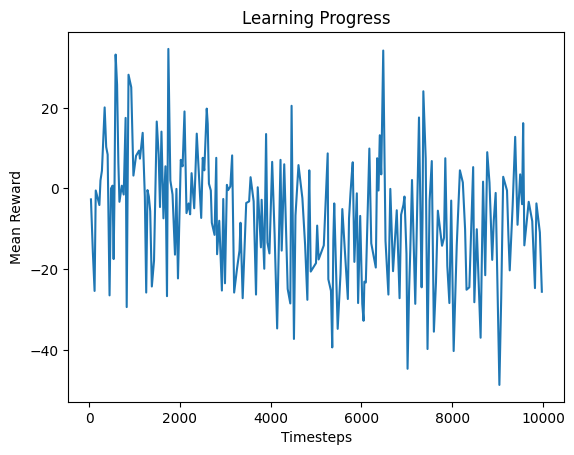

In [9]:
plt.plot(reward_logger.timesteps, reward_logger.rewards)
plt.xlabel("Timesteps")
plt.ylabel("Mean Reward")
plt.title("Learning Progress")
plt.show()